In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = boston.data

In [7]:
data.shape

(506, 13)

In [8]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [23]:
target = boston.target

In [24]:
features_names = boston.feature_names
features_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
X = pd.DataFrame(data, columns=features_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [28]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [30]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
y_pred = lr.predict(X_test)

In [43]:
check_test = pd.DataFrame({'y_test': y_test['price'], 
                           'y_pred': y_pred.flatten()})
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


In [44]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']
check_test.head(10)

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641
76,20.0,23.213983,3.213983
316,17.8,17.593112,-0.206888
140,14.0,14.305081,0.305081
471,19.6,23.054390,3.454390
500,16.8,20.620083,3.820083


In [50]:
# среднеквадрат ошибка
init_mse = (check_test['error'] ** 2).mean()
init_mse

22.098694827098043

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
clk_mse = mean_squared_error(check_test['y_test'], check_test['y_pred'])
clk_mse

22.098694827098036

In [53]:
# средняя абсолютная ошибка
np.abs(check_test['error']).mean()

3.060939595437035

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score

In [55]:
mean_absolute_error(check_test['y_test'], check_test['y_pred'])

3.060939595437034

In [56]:
# R^2
r2_score(check_test['y_test'], check_test['y_pred'])

0.6844267283527123

In [57]:
lr.intercept_

array([29.83642016])

In [58]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

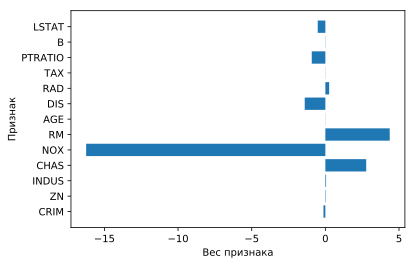

In [60]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [62]:
# признаки не масштабированы и имеют разный разброс значений
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [64]:
# Стандартизация призанков
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train)

In [69]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [70]:
X_test_scaled = scaler.transform(X_test)

In [72]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [73]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Признак')

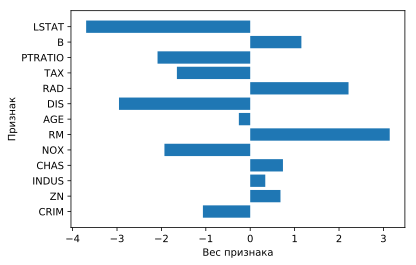

In [74]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [84]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [85]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    return mean_squared_error(y_test, y_pred)

In [87]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression()) < init_mse

True

In [89]:
# линейная регрессия с  L1 и L2 регуляризацией соответственно
from sklearn.linear_model import Lasso, Ridge

In [90]:
model = Lasso(alpha=0.003)

In [91]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.81140873202922

In [92]:
model = Ridge(alpha = 0.001)

In [93]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.790278352569842